In [1]:
#import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [2]:
#load data

P = pd.read_csv('P_AB_BC_2006_2015.csv').values[:,1:]

# Data is saved in a csv where rows are images (days; n=3652) and columns are pixels (m=17*45=765)
# To plot the images as 2-D you first need to reshape each column (1-D) into a 2-D matrix
# This is done for you below in the examples that plot the images 

#load coastline data
coasts = pd.read_csv('coastline.csv',header=None)
coastLat = coasts[0]
coastLon = coasts[1]

P_extent=[-142,-109,48,60] #these are just the known boundaries of the SST grid [lonmin,lonmax,latmin,latmax] for plotting


In [3]:
#confirm size

np.shape(P)

(3652, 765)

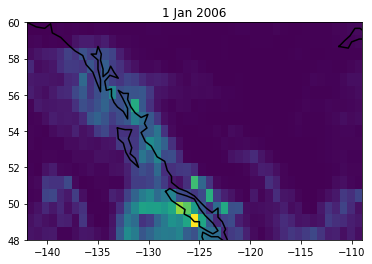

In [4]:
#plot a day

saveIt = 0

Nlat = 17 #number of pixels in image height (latitude)
Nlon = 45 #number of pixels in image width (longitude)
P_day = np.reshape(np.asarray(P[0,:]),(Nlat,Nlon))

plt.imshow(P_day, extent = P_extent, aspect = 'auto')
plt.title('1 Jan 2006')
plt.plot(coastLon, coastLat,'k')
plt.xlim(P_extent[:2])
plt.ylim(P_extent[2:])

if saveIt:
    plt.savefig('lab3_fig1.png')

plt.show()

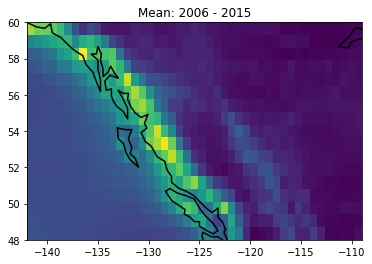

In [5]:
#plot mean precip field

saveIt = 0

Nlat = 17 #number of pixels in image height (latitude)
Nlon = 45 #number of pixels in image width (longitude)
P_mean = np.reshape(np.mean(P, axis = 0),(Nlat,Nlon))

plt.imshow(P_mean, extent = P_extent, aspect = 'auto')
plt.plot(coastLon, coastLat,'k')
plt.xlim(P_extent[:2])
plt.ylim(P_extent[2:])
plt.title('Mean: 2006 - 2015')

if saveIt:
    plt.savefig('lab3_fig_mean.png')

plt.show()

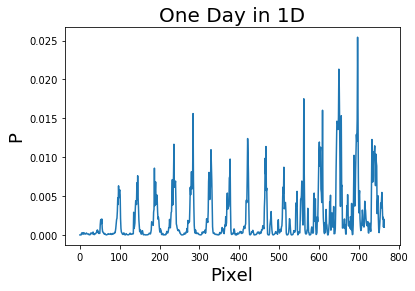

In [6]:
#plot a day in 1D

saveIt = 0

plt.plot(P[0,:])
plt.xlabel('Pixel', fontsize  = 18)
plt.ylabel('P', fontsize  = 18)
plt.title('One Day in 1D', fontsize  = 20)

if saveIt:
    plt.savefig('lab3_fig2.png')

plt.show()

SOLUTIONS

Find the eigenvectors of the dataset

In [7]:
#do PCA using built-in library

n_modes = np.shape(P)[1]
pca = PCA(n_components = n_modes)
P_demean = P-np.mean(P,axis=0)
PCs = pca.fit_transform(P_demean)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

In [8]:
#alternatively, do PCA from scratch (gives same results as above)

x = P_demean.T
s = np.cov(x)
eigvals2,eigvecs2 = np.linalg.eig(s)
fracVar2 = eigvals2/np.sum(eigvals2)
PCs2 = (eigvecs2 @ x).T

In [9]:
#investigate: did PCA work as we expected?  What size of variables do we expect?

nObservations = np.shape(P)[0] #number of images
nVariables = np.shape(P)[1] #number of pixels in each image (i.e. the number of variables that defines each observation)

print('Expected sizes:')
print('\t' + str(nVariables) + ' eigenvectors, each of length ' + str(nVariables))
print('\t' + str(nVariables) + ' eigenvalues, one for each eigenvector')
print('\t' + str(nVariables) + ' PCs, each of length ' + str(nObservations))

print('Actual sizes:')
print('\t' + str(np.shape(eigvecs)[0]) + ' eigenvectors, each of length ' + str(np.shape(eigvecs)[1]))
print('\t' + str(len(fracVar)) + ' eigenvalues')
print('\t' + str(np.shape(PCs)[1]) + ' PCs, each of length ' + str(np.shape(PCs)[0]))





Expected sizes:
	765 eigenvectors, each of length 765
	765 eigenvalues, one for each eigenvector
	765 PCs, each of length 3652
Actual sizes:
	765 eigenvectors, each of length 765
	765 eigenvalues
	765 PCs, each of length 3652


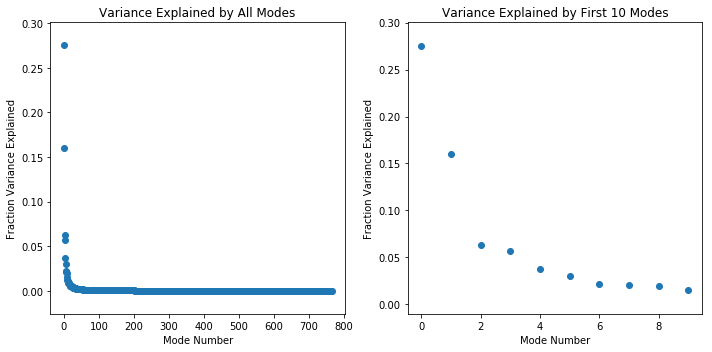

In [10]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

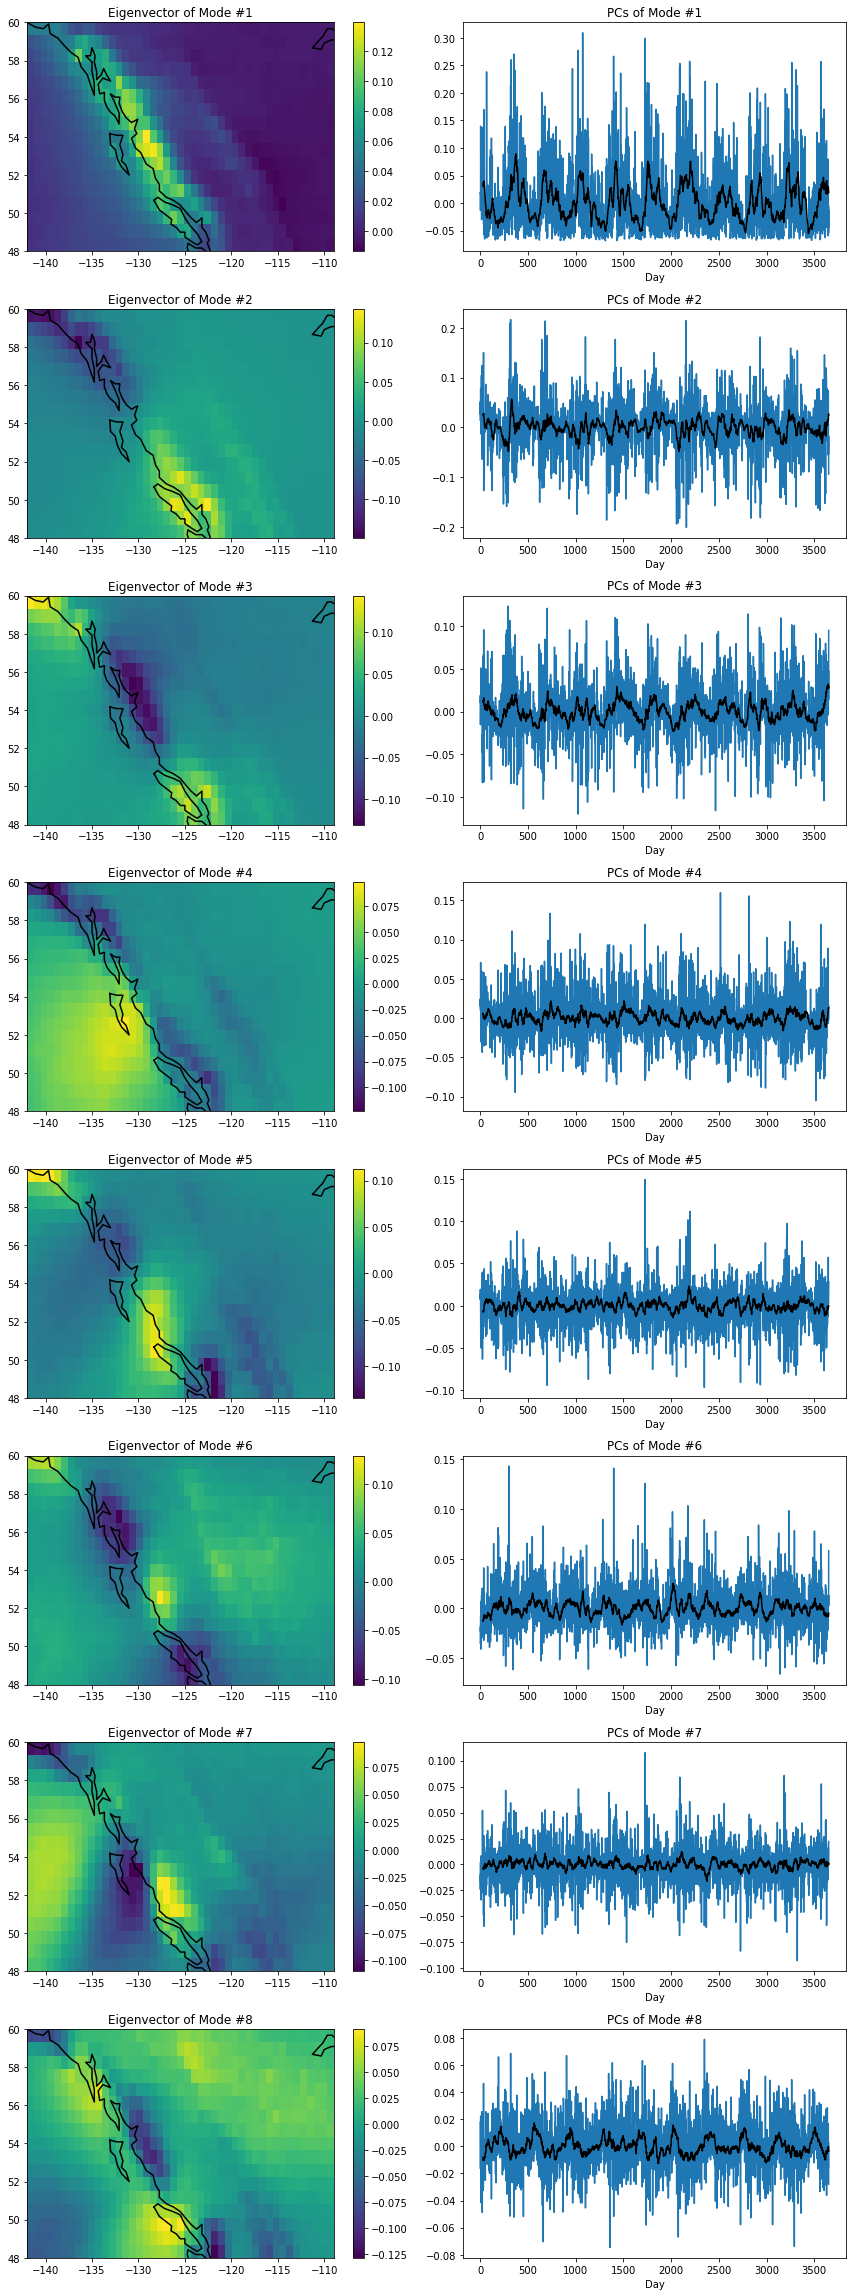

In [12]:
#plot the first n modes and PCs

n = 8

plt.figure(figsize=(12,4*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.imshow(np.reshape(eigvecs[kk,:],(Nlat,Nlon)), aspect = 'auto', extent = P_extent)
    plt.plot(coastLon, coastLat,'k')
    plt.xlim(P_extent[:2])
    plt.ylim(P_extent[2:])
    plt.title('Eigenvector of Mode #' + str(kk+1))
    plt.colorbar()
    
    
    PCs_smooth = pd.Series(PCs[:,kk]).rolling(window = 30).mean()
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.plot(PCs_smooth,'k')
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Day')
    
    plt.tight_layout()

In [24]:
# Ok, so we've chosen to keep the first few modes.  Now, reconstruct days.
### This is a shorter pre-built version of the code used in lab 3
pca = PCA(n_components=8)
PCs = pca.fit_transform(P)
P_rec = pca.inverse_transform(PCs)
    

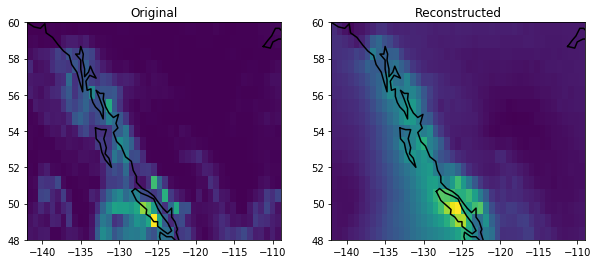

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

axes[0].imshow(P[0].reshape(Nlat,Nlon), aspect = 'auto', extent = P_extent)
axes[0].set_title('Original')
axes[0].plot(coastLon, coastLat,'k')
axes[0].set_xlim(P_extent[:2])
axes[0].set_ylim(P_extent[2:])

axes[1].imshow(P_rec[0].reshape(Nlat,Nlon), aspect = 'auto', extent = P_extent)
axes[1].set_title('Reconstructed')
axes[1].plot(coastLon, coastLat,'k')
axes[1].set_xlim(P_extent[:2])
axes[1].set_ylim(P_extent[2:])

plt.show()

In [ ]:
# np.min(np.argwhere(eraYears>=2006))

# np.shape(P_decade)

# P_decade = P[9862:,:,:] * 4
# Tmax_decade = Tmax[9862:,:,:]
# Tmin_decade = Tmin[9862:,:,:]

# Ndays, Nlat, Nlon = P_decade.shape

# P_decade = P_decade.reshape(Ndays, Nlat*Nlon)
# Tmax_decade = Tmax_decade.reshape(Ndays, Nlat*Nlon)
# Tmin_decade = Tmin_decade.reshape(Ndays, Nlat*Nlon)

# np.max(eraLon)

# df_P = pd.DataFrame(data = P_decade)
# df_Tmax = pd.DataFrame(data = Tmax_decade)
# df_Tmin = pd.DataFrame(data = Tmin_decade)

# df_P.to_csv('P_AB_BC_2006_2015.csv')
# df_Tmax.to_csv('Tmax_AB_BC_2006_2015.csv')
# df_Tmin.to_csv('Tmin_AB_BC_2006_2015.csv')